In [ ]:
import xml.etree.ElementTree as ET
import os
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from pathlib import Path

In [ ]:
ALL_CLASSES = ["aquarium", "bottle", "bowl", "box", "bucket", "plastic_bag", "plate", "styrofoam", "tire", "toilet", "tub", "washing_machine", "water_tower"]

In [ ]:
# train dataset
!cp drive/MyDrive/作業/深度學習概論與應用/cdc/train_cdc.zip .
!unzip -q train_cdc.zip

In [ ]:
def check_class(image_id):
  in_file = open('train_cdc/train_annotations/%s.xml'%(image_id))
  tree = ET.parse(in_file)
  root = tree.getroot()
  size = root.find('size')
  w = int(size.find('width').text)
  h = int(size.find('height').text)
  global total_max_size, image_cnt
  total_max_size += max(w, h)
  image_cnt += 1
  annotations = []
  for obj in root.iter('object'):
    cls = obj.find('name').text
    if cls not in ALL_CLASSES:
        print('%s ignored.'%cls)
        continue
    xmlbox = obj.find('bndbox')
    b = [float(xmlbox.find('xmin').text),
         float(xmlbox.find('ymin').text),
         float(xmlbox.find('xmax').text),
         float(xmlbox.find('ymax').text)]
    annotations.append((cls, b))
    train_distribution[cls] += 1
  images_with_annotation.append((image_id, annotations))

train_distribution = {x: 0 for x in ALL_CLASSES}
images_with_annotation = []
total_max_size = 0
image_cnt = 0

_, _, filenames = next(os.walk('train_cdc/train_images'))
image_ids = [os.path.splitext(filename)[0] for filename in filenames]

for image_id in image_ids:
    check_class(image_id)

In [ ]:
print("image count: {}".format(image_cnt))
average_max_size = int(total_max_size/image_cnt+.5)
print("average max size: {}".format(average_max_size))

image count: 2671
average max size: 438


In [ ]:
for img_id, annotations in images_with_annotation:
  source_img = Image.open('train_cdc/train_images/{}.jpg'.format(img_id)).convert('RGB')
  img = {x: source_img.copy() for x in ALL_CLASSES}
  draw = {x: ImageDraw.Draw(img[x]) for x in ALL_CLASSES}
  exist = set()
  for cls, bbox in annotations:
    draw[cls].rectangle(bbox, outline='red')
    exist.add(cls)
  for cls in exist:
    dir_path = 'image_by_class/{}'.format(cls)
    Path(dir_path).mkdir(parents=True, exist_ok=True)
    img[cls].save('{}/{}.jpg'.format(dir_path, img_id))

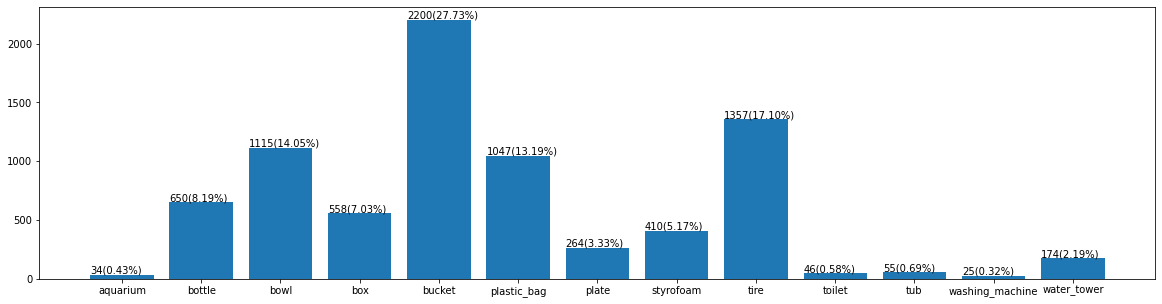

In [ ]:
total_instances = sum(train_distribution.values())
plt.figure(figsize=(20, 5))
plt.bar(range(len(ALL_CLASSES)), train_distribution.values())
plt.xticks(range(len(ALL_CLASSES)), ALL_CLASSES)
for idx, val in enumerate(train_distribution.values()):
  plt.text(idx-.4, val+10, str(str(val)+'({:.2f}%)'.format(val/total_instances*100)))
plt.show()

In [ ]:
!cp -r image_by_class drive/MyDrive/作業/深度學習概論與應用/cdc